In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Exploración de los datos

## Panorama general

Primero creamos un dataframe del archivo de datos:

In [2]:
df = pd.read_csv("datasets/datos_train.csv")

In [3]:
df.head()

,id,Sexo,SaludGeneral,SaludFisica,SaludMental,ActividadFisica,TiempoDeSueño,AccidenteCerebrovascular,Asma,CáncerDePiel,Diabetes,IMC,ConsumoDeAlcohol,Raza,CategoriaDeEdad,EnfermedadRenal,Fumador,DificultadParaCaminar,EnfermedadCoronaria
0,0,Male,Excellent,0.0,0.0,Yes,8.0,No,Yes,No,No,25.85,No,White,30-34,No,No,No,0
1,1,Male,Good,0.0,0.0,Yes,8.0,No,No,No,No,32.08,No,White,55-59,No,No,No,0
2,2,Male,Good,0.0,0.0,Yes,7.0,No,Yes,No,No,28.27,NaN,"White only, Non-Hispanic",Age 75 to 79,Yes,Former smoker,No,0
3,3,Male,Good,7.0,7.0,Yes,5.0,No,No,No,No,28.98,Yes,"Black only, Non-Hispanic",Age 55 to 59,No,Never smoked,No,0
4,4,Male,Good,0.0,0.0,Yes,8.0,No,No,No,No,NaN,No,"Other race only, Non-Hispanic",Age 18 to 24,No,Never smoked,No,0


In [4]:
df.describe()

,id,SaludFisica,SaludMental,TiempoDeSueño,IMC,EnfermedadCoronaria
count,609489.000000,601032.000000,602425.000000,605360.000000,570872.000000,609489.000000
mean,304744.000000,3.914614,4.170209,7.052138,28.437425,0.068886
std,175944.463447,8.374257,8.199712,1.471066,6.465875,0.253260
min,0.000000,0.000000,0.000000,1.000000,12.020000,0.000000
25%,152372.000000,0.000000,0.000000,6.000000,24.030000,0.000000
50%,304744.000000,0.000000,0.000000,7.000000,27.370000,0.000000
75%,457116.000000,3.000000,4.000000,8.000000,31.600000,0.000000
max,609488.000000,30.000000,30.000000,24.000000,99.340000,1.000000


In [5]:
df.isna().sum()

id                               0
Sexo                             0
SaludGeneral                   882
SaludFisica                   8457
SaludMental                   7064
ActividadFisica                770
TiempoDeSueño                 4129
AccidenteCerebrovascular       870
Asma                          1127
CáncerDePiel                  2229
Diabetes                       664
IMC                          38617
ConsumoDeAlcohol             36782
Raza                         10955
CategoriaDeEdad               7021
EnfermedadRenal               1302
Fumador                      27921
DificultadParaCaminar        18902
EnfermedadCoronaria              0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609489 entries, 0 to 609488
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         609489 non-null  int64  
 1   Sexo                       609489 non-null  object 
 2   SaludGeneral               608607 non-null  object 
 3   SaludFisica                601032 non-null  float64
 4   SaludMental                602425 non-null  float64
 5   ActividadFisica            608719 non-null  object 
 6   TiempoDeSueño              605360 non-null  float64
 7   AccidenteCerebrovascular   608619 non-null  object 
 8   Asma                       608362 non-null  object 
 9   CáncerDePiel               607260 non-null  object 
 10  Diabetes                   608825 non-null  object 
 11  IMC                        570872 non-null  float64
 12  ConsumoDeAlcohol           572707 non-null  object 
 13  Raza                       59

Eliminamos la columna `id` ya que no sera de utilidad para el análisis exploratorio:

In [40]:
df = df.drop(['id'], axis=1)

## Descripción de las variables

| Campo                     | Descripción                                            |
|---------------------------|--------------------------------------------------------|
| Sexo                      | Género del paciente                                    |
| SaludGeneral              | Autopercepción de la salud general del paciente        |
| SaludFisica               | Autopercepción de la salud física del paciente         |
| SaludMental               | Autopercepción de la salud mental del paciente         |
| ActividadFisica           | Nivel de actividad física del paciente                 |
| TiempoDeSueño             | Horas promedio de sueño del paciente por noche         |
| AccidenteCerebrovascular  | Antecedentes de accidente cerebrovascular del paciente |
| Asma                      | Antecedentes de asma del paciente                      |
| CáncerDePiel              | Antecedentes de cáncer de piel del paciente            |
| Diabetes                  | Antecedentes de diabetes del paciente                  |


Mostrar variables categóricas:

In [41]:
def get_categorical_columns(df):
    return [c for c in df.columns if df[c].dtype == "O"]

get_categorical_columns(df)

['Sexo',
 'SaludGeneral',
 'ActividadFisica',
 'AccidenteCerebrovascular ',
 'Asma',
 'CáncerDePiel',
 'Diabetes',
 'ConsumoDeAlcohol',
 'Raza',
 'CategoriaDeEdad',
 'EnfermedadRenal',
 'Fumador',
 'DificultadParaCaminar']

Sus posibles valores son:

In [47]:
for x in df["Sexo"].unique():
    print(x)

Male
Female


Creamos una función que nos crea un archivo de texto que guarda, por cada variable categórica, cuales son sus posibles valores y con qué frecuencia aparecen:

In [51]:
def show_categorical_variables_values(df, path_to_file: str):
    lines = []
    for col in get_categorical_columns(df):
        lines.append(f"[-] {col}:")
        for i, val in enumerate(df[col].unique()):
            if val == "nan":
                continue
            freq = (df[col] == val).sum()
            lines.append(f"\t[{i}] {val} | {freq}")
    
    with open(path_to_file, 'w') as file:
        for line in lines:
            file.write(line + '\n')

show_categorical_variables_values(df, "valores_variables.txt")

A continuación analizamos la distribución de los datos. Para ello codificamos los valores del DataFrame para poder crear un histograma:

In [42]:
def encode_df(df):
    encoded_df = df.copy()
    for column in get_categorical_columns(df):
        encoded_df[column] = LabelEncoder().fit_transform(df[column])
    return encoded_df

encoded_df = encode_df(df)

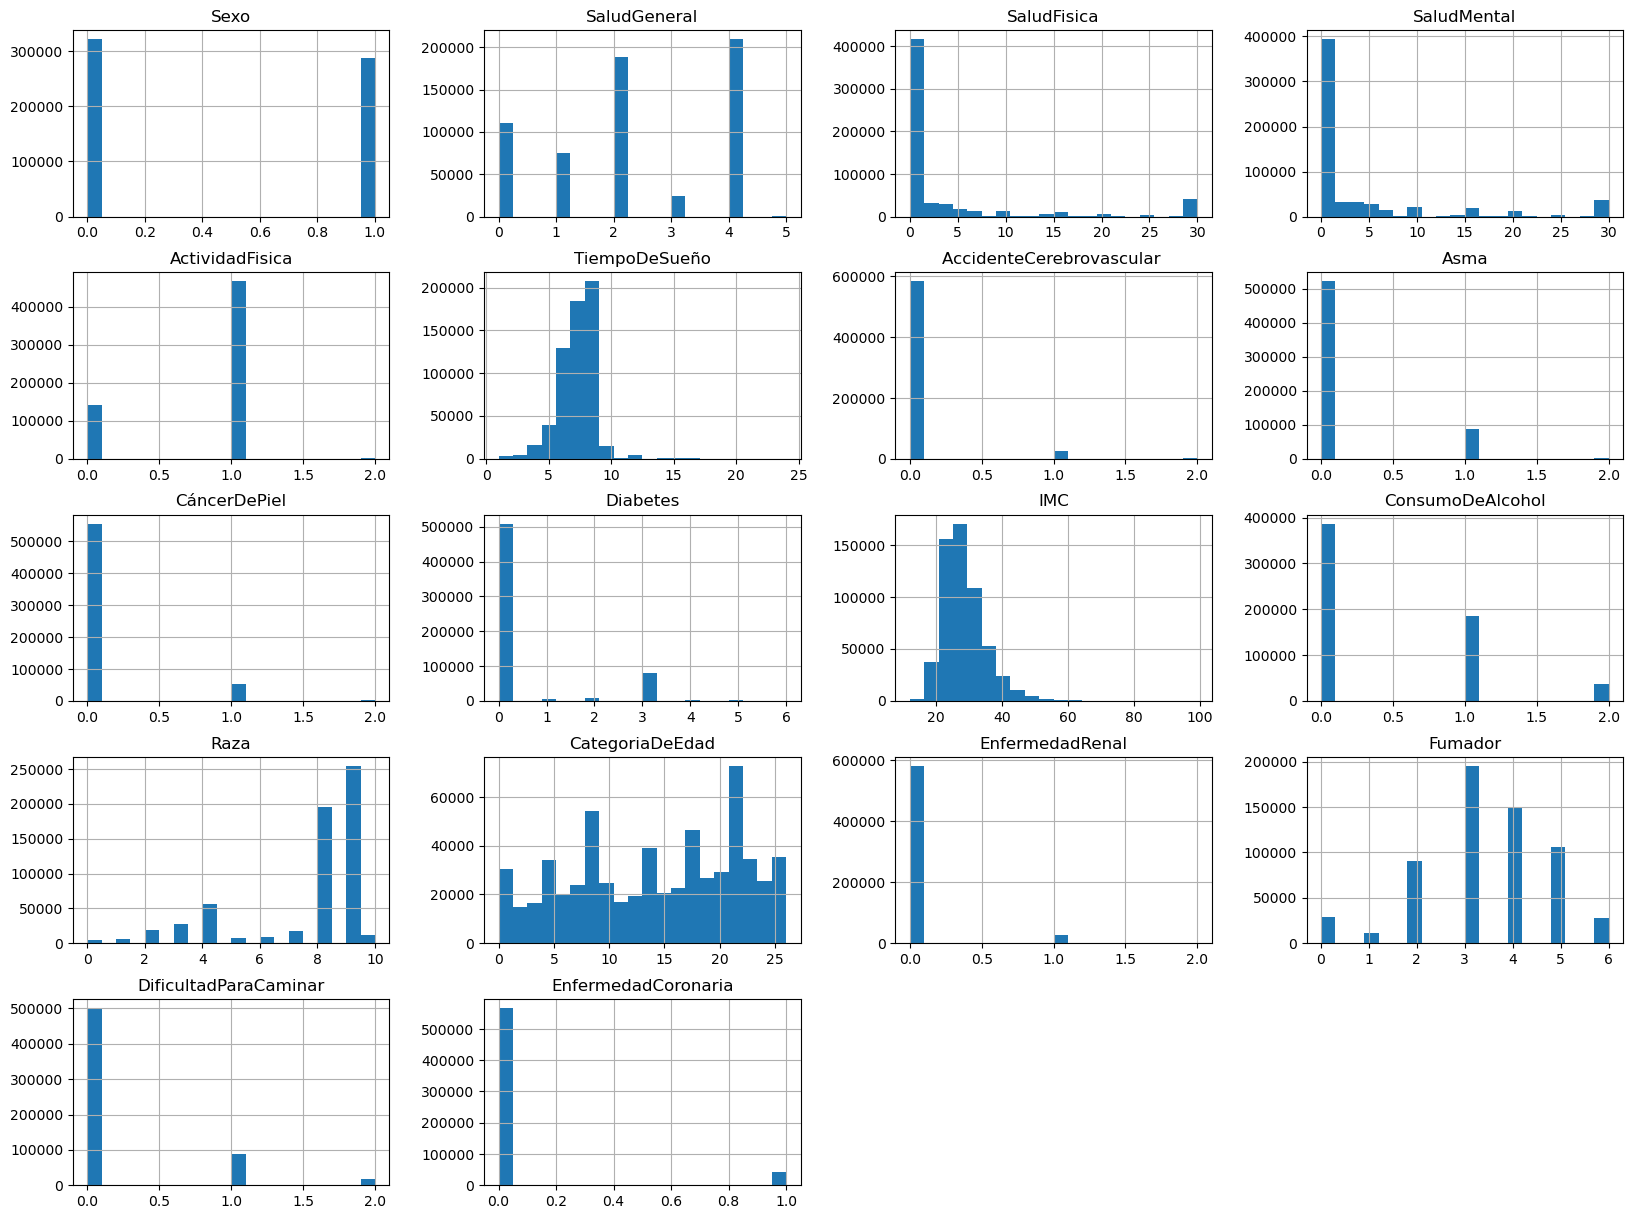

In [43]:
encoded_df.hist(bins=20, figsize=(20,15))
plt.show()

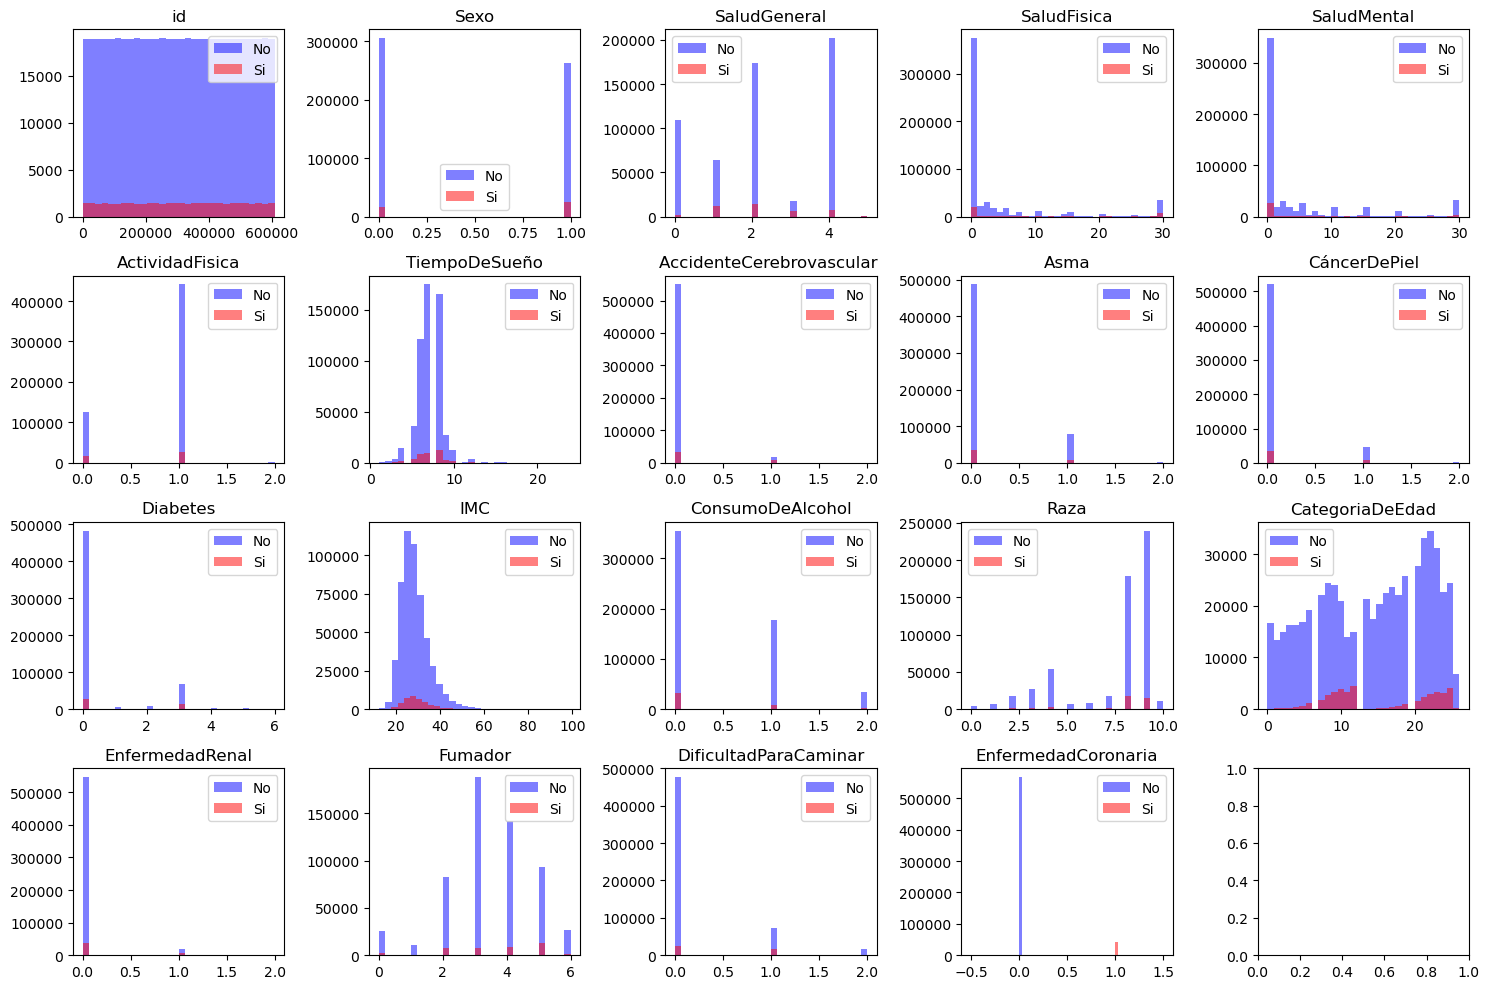

In [35]:
def create_histogram(df, rows, cols, figsize):
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    axs = axs.ravel()

    for i, col in enumerate(df.columns):  # Exclude the target column "clase"
        ax = axs[i]
        bins = 30  # Number of bins for the histogram
        target = "EnfermedadCoronaria"
        ax.hist(df[df[target] == 0][col], bins=bins, alpha=0.5, color='blue', label='No')
        ax.hist(df[df[target] == 1][col], bins=bins, alpha=0.5, color='red', label='Si')
        ax.set_title(col)
        ax.legend()

    plt.tight_layout()
    plt.show()

create_histogram(encoded_df, 4, 5, (15, 10))

Los valores que toman estas variables son:

In [16]:
def plot_variables_value_distribution(df, figsize=(15, 20)):
    fig, axes = plt.subplots(5, 2, figsize=figsize)
    color = 'gray'
    columns = df.columns[1:]

    for ax, col in zip(axes.flat, columns):
        sns.countplot(x=df[col], ax=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

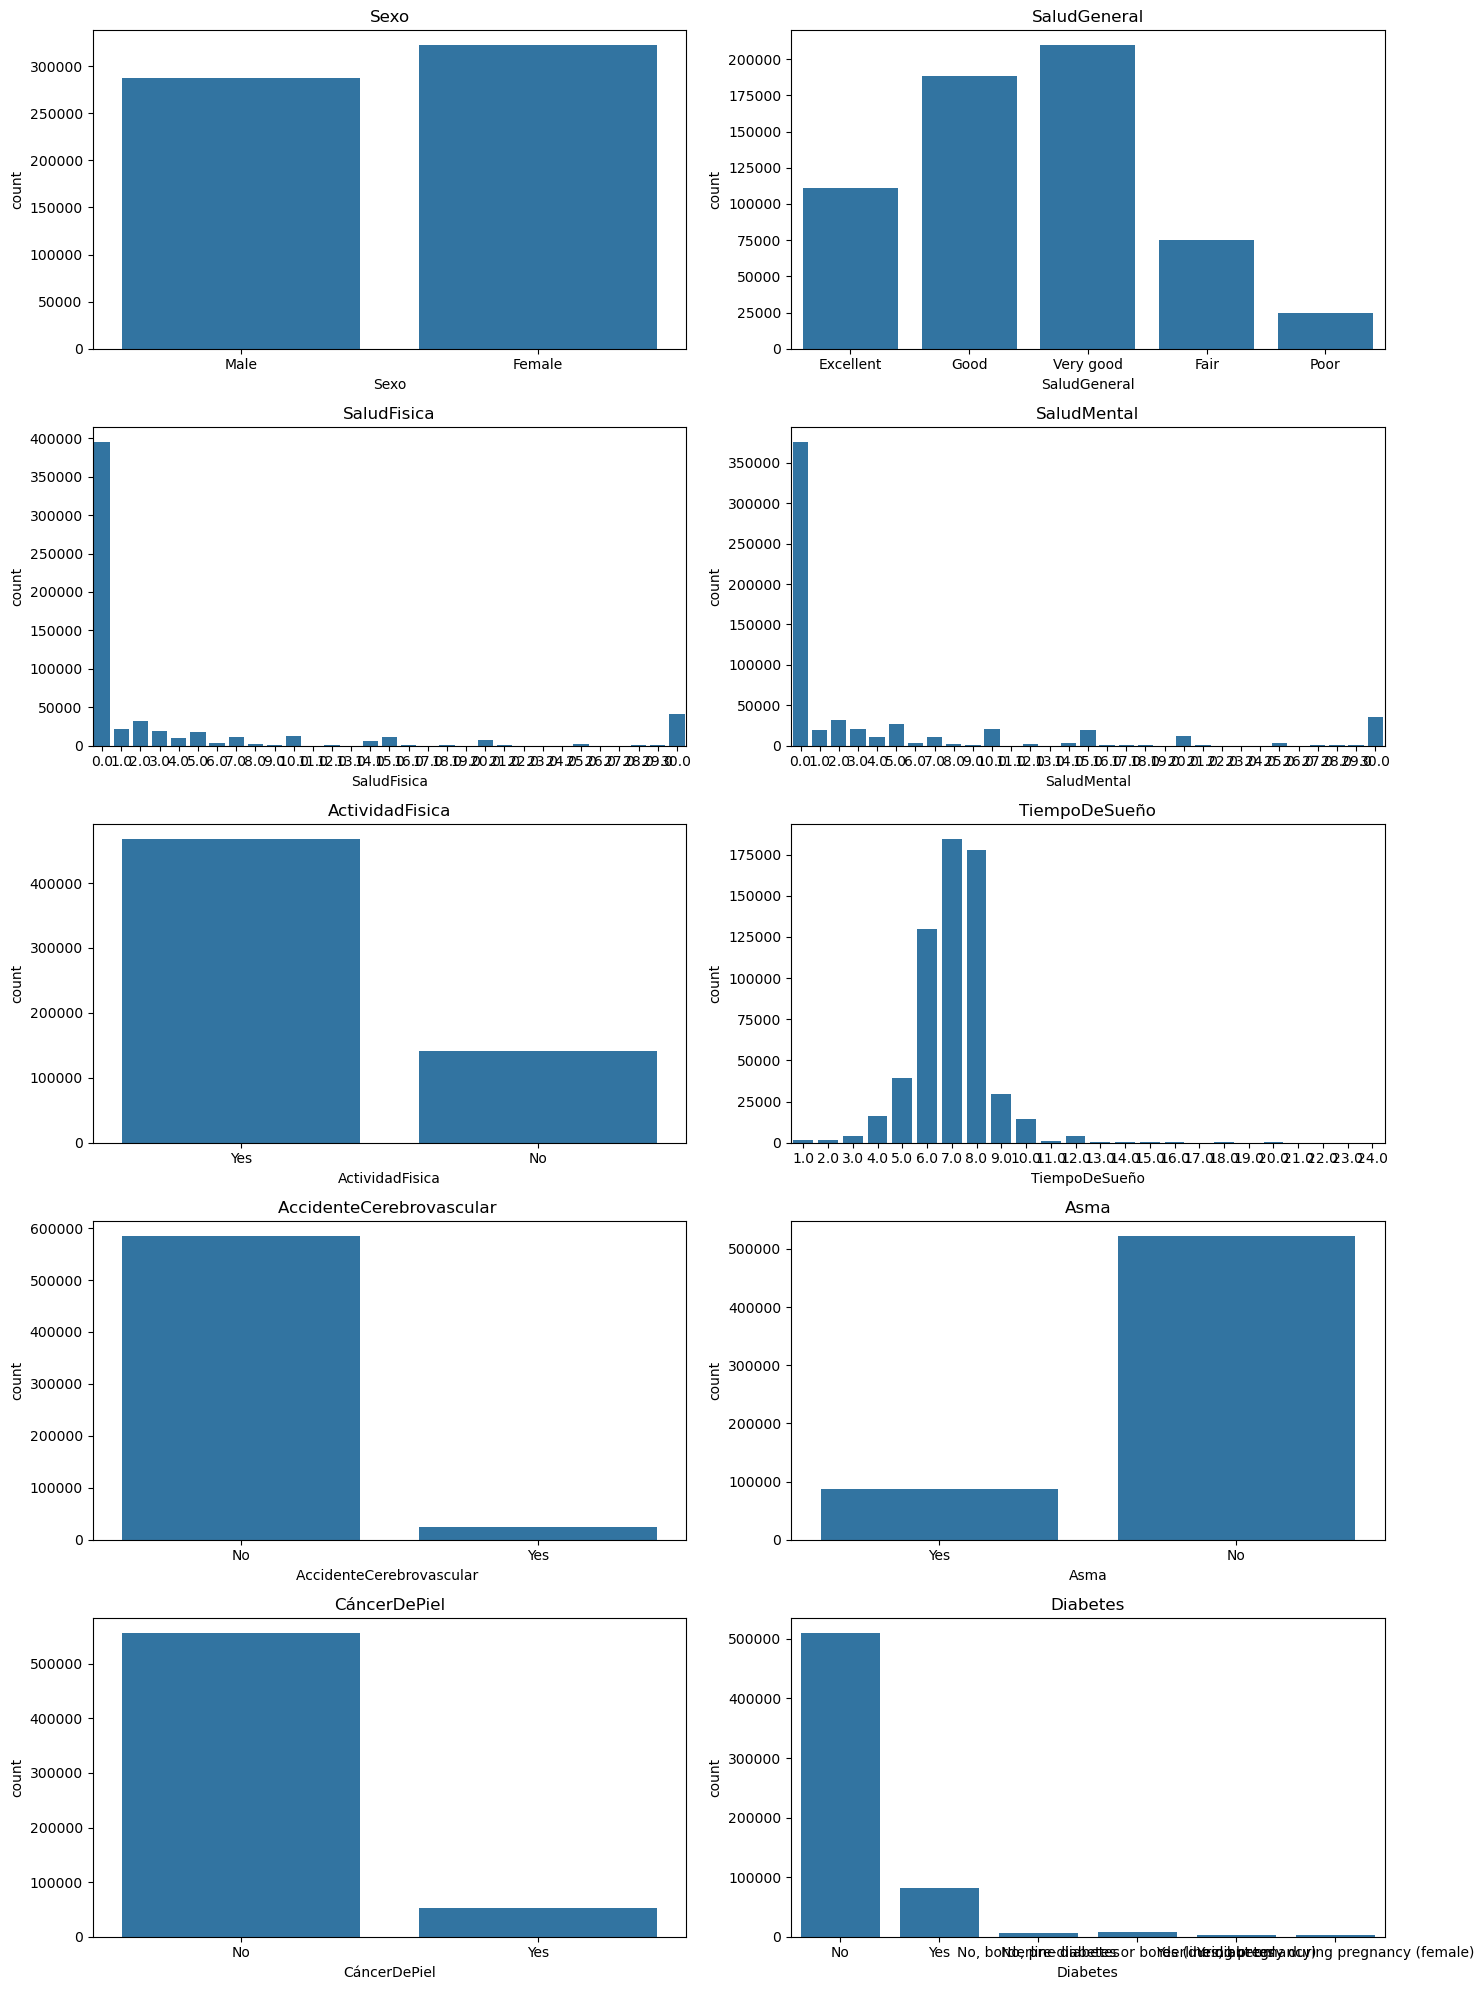

In [17]:
plot_variables_value_distribution(df)

<Axes: xlabel='count', ylabel='Sexo'>

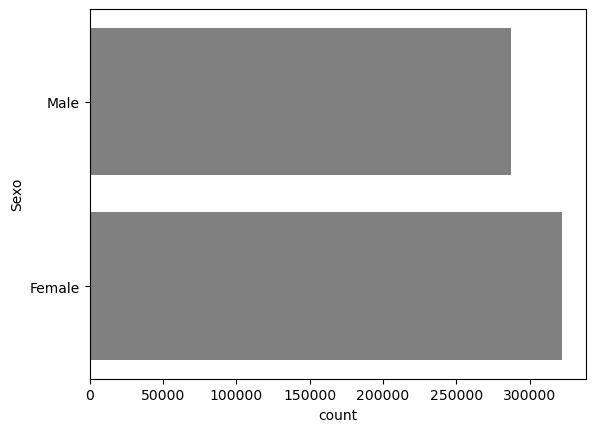

In [10]:
sns.countplot(df['Sexo'], color='gray')

In [7]:
df["SaludGeneral"].unique()

array(['Excellent', 'Good', nan, 'Very good', 'Fair', 'Poor'],
      dtype=object)

In [15]:
df['colour'].value_counts().plot(kind='bar')

KeyboardInterrupt: 